In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [96]:
height = 8
width = 8
size = height*width
path = "..\..\datasets\\UNSW_NB15"
csv_file = path + "\\unswnb15_img_flow.csv"

In [97]:
df1 = pd.read_csv(path+"\\UNSW_NB15_training-set.csv")
df1 = df1.drop(["id"], axis=1)

In [98]:
df2 = pd.read_csv(path+"\\UNSW_NB15_testing-set.csv")
df2 = df2.drop(["id"], axis=1)

In [99]:
df = pd.concat([df1, df2])

In [100]:
df = df.drop_duplicates()

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162745 entries, 0 to 82328
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                162745 non-null  float64
 1   proto              162745 non-null  object 
 2   service            162745 non-null  object 
 3   state              162745 non-null  object 
 4   spkts              162745 non-null  int64  
 5   dpkts              162745 non-null  int64  
 6   sbytes             162745 non-null  int64  
 7   dbytes             162745 non-null  int64  
 8   rate               162745 non-null  float64
 9   sttl               162745 non-null  int64  
 10  dttl               162745 non-null  int64  
 11  sload              162745 non-null  float64
 12  dload              162745 non-null  float64
 13  sloss              162745 non-null  int64  
 14  dloss              162745 non-null  int64  
 15  sinpkt             162745 non-null  float64
 16  dinpkt  

In [102]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [103]:
df.attack_cat.unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [104]:
df = df.drop(["label"], axis=1)

In [105]:
len(df.proto.unique())

133

In [106]:
indices = list(df.proto.unique())

In [107]:
indices.index("tcp")

0

In [108]:
# move tcp to end of list
indices.remove("tcp")
indices.append("tcp")
indices.index("tcp")

132

In [109]:
indices.index("udp")

0

In [110]:
# move udp to start of list
indices.remove("udp")
indices = ["udp"] + indices
indices.index("udp")

0

In [111]:
df.proto = df.proto.apply(lambda x: indices.index(x))

In [117]:
indices = list(df.service.unique())
df.service = df.service.apply(lambda x: indices.index(x))

In [118]:
indices = list(df.state.unique())
df.state = df.state.apply(lambda x: indices.index(x))

In [112]:
df.proto.unique()

array([132,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131], dtype=int64)

In [113]:
df = df.rename(columns={"attack_cat": "label"})

In [114]:
df.label.unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [115]:
len(df.label.unique())

10

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162745 entries, 0 to 82328
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                162745 non-null  float64
 1   proto              162745 non-null  int64  
 2   service            162745 non-null  int64  
 3   state              162745 non-null  int64  
 4   spkts              162745 non-null  int64  
 5   dpkts              162745 non-null  int64  
 6   sbytes             162745 non-null  int64  
 7   dbytes             162745 non-null  int64  
 8   rate               162745 non-null  float64
 9   sttl               162745 non-null  int64  
 10  dttl               162745 non-null  int64  
 11  sload              162745 non-null  float64
 12  dload              162745 non-null  float64
 13  sloss              162745 non-null  int64  
 14  dloss              162745 non-null  int64  
 15  sinpkt             162745 non-null  float64
 16  dinpkt  

In [120]:
df = df.to_numpy()
df.shape

(162745, 43)

In [121]:
# normalize payload, ttl, total_len
for col_index in range(df.shape[1]-1):
    column = df[:, col_index]
    column_normalized = (column - np.min(column)) / (np.max(column) - np.min(column) + 0.1)
    df[:, col_index] = column_normalized

(42,)
Normal
(64,)
(8, 8)


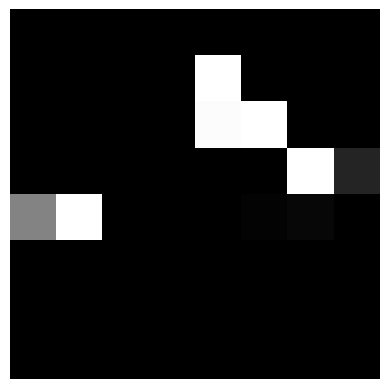

DONE


In [122]:
def convert_dataset_to_grayscale_image(arr):
    for idx, row in enumerate(arr):
        data = row[:-1]
        label = row[-1]
        print(data.shape)
        print(label)
        
        data = np.pad(data, pad_width=int((size-len(data))/2), constant_values=0)
        print(data.shape)
        data = data.reshape(height, width).astype('float64')
        print(data.shape)
        
        plt.imshow(data, cmap='gray')
        plt.axis('off')  # Remove axes
        plt.show()
        
        break
    print("DONE")
        
convert_dataset_to_grayscale_image(df)

(42,)
Normal
(8, 8)
(8, 8)
(8, 8)
(8, 8, 3)


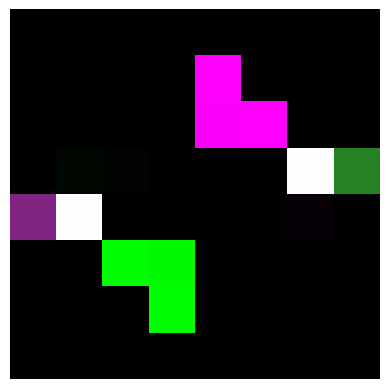

DONE


In [123]:
def convert_dataset_to_rgb_image(arr):
    for idx, row in enumerate(arr):
        data = row[:-1]
        label = row[-1]
        print(data.shape)
        print(label)
        
        data = np.pad(data, pad_width=int((size-len(data))/2), constant_values=0)
        data = data.reshape(height, width)
        
        channel_1 = data.astype('float64')
        print(channel_1.shape)
        channel_2 = np.rot90(channel_1, k=2).reshape(height, width)
        print(channel_2.shape)
        channel_3 = np.rot90(channel_2, k=2).reshape(height, width)
        print(channel_3.shape)
        img = np.stack((channel_1, channel_2, channel_3)).transpose((1, 2, 0))
        print(img.shape)
        
        plt.imshow(img)
        plt.axis('off')  # Remove axes
        plt.show()
        
        break
    print("DONE")
        
convert_dataset_to_rgb_image(df)

In [124]:
with open(csv_file, 'w') as f:
    np.savetxt(f, [np.array(["file_name", "label"])], delimiter=',', fmt='%s')

def convert_dataset_to_image(arr):
    with open(csv_file, 'a') as f:
        for idx, row in enumerate(arr):
            data = row[:-1]
            label = row[-1]
            if idx % 1000 == 0:
                print(idx, label)
            
            data = np.pad(data, pad_width=int((size-len(data))/2), constant_values=0)
            data = data.reshape(height, width)
            
            channel_1 = data.astype('float64')
            channel_2 = np.rot90(channel_1, k=2).reshape(height, width)
            channel_3 = np.rot90(channel_2, k=2).reshape(height, width)
            img = np.stack((channel_1, channel_2, channel_3)).transpose((1, 2, 0))
            
            file_name = f"unswnb15_{idx}.png"
            cv2.imwrite(path+"\image_flow\\"+file_name, img*255)
            
            log = np.array([file_name, label])
            np.savetxt(f, [log], delimiter=',', fmt='%s')
    print("DONE")
        

convert_dataset_to_image(df)

0 Normal
1000 Normal
2000 Normal
3000 Normal
4000 Normal
5000 Normal
6000 Normal
7000 Normal
8000 Normal
9000 Normal
10000 Normal
11000 Normal
12000 Normal
13000 Normal
14000 Normal
15000 Normal
16000 Normal
17000 Normal
18000 Normal
19000 Normal
20000 Normal
21000 Normal
22000 Normal
23000 Normal
24000 Normal
25000 Normal
26000 Normal
27000 Normal
28000 Normal
29000 Normal
30000 Normal
31000 Normal
32000 Normal
33000 Normal
34000 Normal
35000 Normal
36000 Normal
37000 Normal
38000 Normal
39000 Normal
40000 Normal
41000 Normal
42000 Normal
43000 Normal
44000 Normal
45000 Normal
46000 Normal
47000 Fuzzers
48000 Fuzzers
49000 Exploits
50000 Exploits
51000 Analysis
52000 Exploits
53000 Fuzzers
54000 Exploits
55000 Exploits
56000 Exploits
57000 Exploits
58000 Reconnaissance
59000 Analysis
60000 DoS
61000 Fuzzers
62000 Exploits
63000 Exploits
64000 Normal
65000 Normal
66000 Backdoor
67000 Exploits
68000 Exploits
69000 DoS
70000 Fuzzers
71000 Exploits
72000 Normal
73000 Exploits
74000 Reconn